In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Euler's method

In [2]:
def euler_step(x_n, t_n, h, df_dt):
    return x_n + h*df_dt(x_n, t_n)

In [3]:
def euler_method(x_0, df_dx, T, h):
    t0, tn = T
    n = int((tn-t0)//h)
    x = x_0
    t, X = [t0], [x_0]
    for i in range(1,n+2):
        x = euler_step(x, t0+i*h, h, df_dx)
        X.append(x)
        t.append(t0+i*h)
    return t, X

# Runge-Kutta method

In [4]:
def rk4_step(x_n, t_n, h, df_dx):
    k1 = df_dx(x_n, t_n)
    k2 = df_dx(x_n + (k1*h / 2), t_n + (h/2))
    k3 = df_dx(x_n + (k2*h / 2), t_n + (h/2))
    k4 = df_dx(x_n + k3*h, t_n + h)

    return x_n + h/6*(k1 + 2*k2 + 2*k3 + k4)

In [5]:
def runge_kutta_method(x_0, df_dx, T, h):
    t0, tn = T
    n = int((tn-t0)//h)
    x = x_0
    t, X = [t0], [x_0]
    for i in range(1, n+2):
        x = rk4_step(x, t0+i*h, h, df_dx)
        X.append(x)
        t.append(t0+i*h)
    return t, X

# Comparison on  $\space y' = sin(t)^2 y$

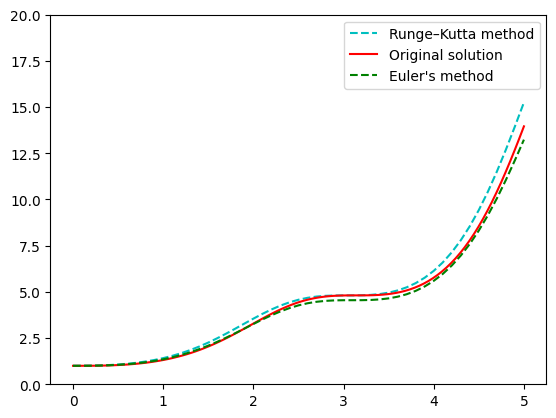

In [6]:
df_dx = lambda x, t: (np.sin(t)**2) *x
h = 0.1
T = (0, 5)
x = np.linspace(*T, 100)
y = np.exp(0.5*(x-np.sin(x)*np.cos(x)))
plt.ylim(0, 20)
plt.plot(*runge_kutta_method(1, df_dx, T,  h), "c--", label="Runge–Kutta method")
plt.plot(x, y, 'r', label="Original solution")
plt.plot(*euler_method(1, df_dx, T,  h), 'g--', label="Euler's method")
plt.legend()

# Comparison on Lotka-Volterra equations

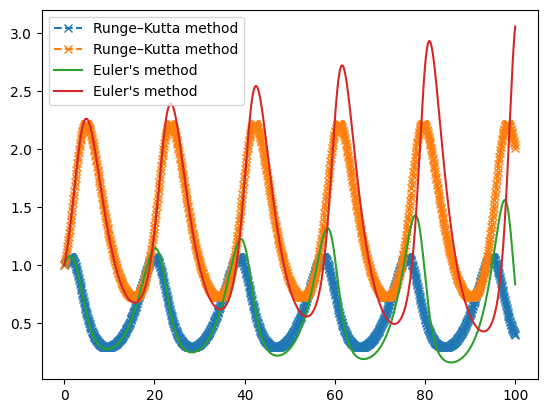

In [7]:
df_dx = lambda x, t: np.array([x[0]*(0.4 - 0.3*x[1]),
                              x[1]*(-0.3 + 0.5*x[0])])
h = 0.1
T = (0, 100)
plt.plot(*runge_kutta_method(np.array([1, 1]), df_dx, T,  h), 'x--',label="Runge–Kutta method")
plt.plot(*euler_method(np.array([1, 1]), df_dx, T,  h), label="Euler's method")
plt.legend()

## On $y = x^2$

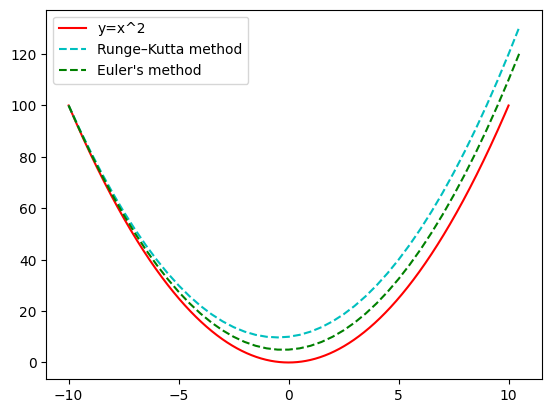

In [8]:
df_dx = lambda x, t: 2*t 
h = 0.5
T = (-10, 10)
plt.plot(x:=np.linspace(*T, 1000), x**2, 'r', label="y=x^2")
plt.plot(*runge_kutta_method(100, df_dx, T,  h), "c--", label="Runge–Kutta method")
plt.plot(*euler_method(100, df_dx, T,  h), 'g--', label="Euler's method")
plt.legend()